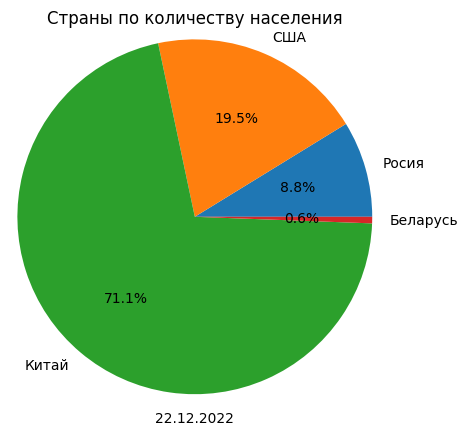

In [1]:
import matplotlib
import matplotlib.pyplot as plt

if __name__ == "__main__":

    fig, ax = plt.subplots()
   

    # Настройки диаграммы и осей
    ax.set_title("Страны по количеству населения")
    ax.set_xlabel("22.12.2022")

    
    data = [
        ["Росия", 148],
        ["США", 330],
        ["Китай", 1200],
        ["Беларусь", 10],
       
    ]
    values = [x[1] for x in data]
    labels = [x[0] for x in data]

    ax.pie(values, labels=labels, autopct="%.1f%%", radius=1.2)
    ax.set_aspect("equal")

    plt.show()